In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import os
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches

In [2]:
fits_dir = '/xdisk/timeifler/wxs0703/kl_nn/fits/'
samp_dir = '/xdisk/timeifler/wxs0703/kl_nn/samples/samples.csv'
fig_dir = '/xdisk/timeifler/wxs0703/kl_nn/figures/'

In [3]:
samples = pd.read_csv(samp_dir)

In [7]:
np.array(samples.iloc[1])[1:]

array([  0.92061315,  -0.27280291,   1.73572994,   0.28755   ,
        -1.203     , 175.848     ,   9.423325  ,   4.075125  ])

In [4]:
hdu = fits.open(join(fits_dir, 'training_0.fits'))
hdu[15].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32                                                  
NAXIS2  =                   30                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INSTNAME= 'CTIO/DECam'                                                          
OBSTYPE =                    0                                                  
PIXSCALE=               0.2637                                                  
PSFTYPE = 'airy_fwhm'                                                           
PSFFWHM =                  1.0                                                  
DIAMETER=             378.28

In [5]:
hdu.info()

Filename: /xdisk/timeifler/wxs0703/kl_nn/fits/training_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 ImageHDU        24   (61,)   float64   
  2                1 ImageHDU        24   (61,)   float64   
  3                1 ImageHDU        24   (61,)   float64   
  4                1 ImageHDU        24   (61,)   float64   
  5                1 ImageHDU        24   (61,)   float64   
  6                1 ImageHDU        24   (61,)   float64   
  7                1 ImageHDU        24   (61,)   float64   
  8                1 ImageHDU        24   (61,)   float64   
  9                1 ImageHDU        24   (61,)   float64   
 10                1 ImageHDU        24   (61,)   float64   
 11                1 ImageHDU        21   (32, 30)   float32   
 12                1 ImageHDU        21   (32, 30)   float32   
 13                1 ImageHDU        21   (32, 30)   float32   
 14                1 Im

In [12]:
pixscale = hdu[11].header['PIXSCALE']

In [6]:
image_data = hdu[11].data

In [23]:
spec_stack = [hdu[2*i+1].data for i in range(5)]

In [24]:
spec_stack = np.vstack(spec_stack)

In [26]:
print(spec_stack)

[[ 1.10708696  1.46152834  1.50655631  1.50860595  1.50927195  1.50992726
   1.51058337  1.51124086  1.51190029  1.51256221  1.51322719  1.51389579
   1.51456855  1.51524577  1.51592727  1.51661232  1.51729999  1.51798932
   1.51867932  1.51936904  1.52005752  1.52074502  1.52148956  1.52383764
   1.55036116  1.78521301  3.05399719  7.17441746 14.84320821 21.47014431
  20.25745807 12.43523509  5.43346652  2.37864977  1.64019901  1.53862754
   1.53124855  1.531632    1.53238964  1.53317637  1.53398013  1.53479655
   1.53562123  1.53644975  1.53727769  1.53810063  1.53891413  1.53971374
   1.540495    1.54125351  1.54198526  1.54268798  1.54336226  1.54401042
   1.54463521  1.54523943  1.54582588  1.54638611  1.54551173  1.50043367
   1.13714857]
 [ 0.1694997   0.22376615  0.2306601   0.23097388  0.23107582  0.23117612
   0.23127655  0.23137719  0.23147812  0.23157944  0.23168122  0.23178356
   0.23188653  0.23199019  0.23209451  0.23219936  0.23230462  0.23241013
   0.23251575  0.232621

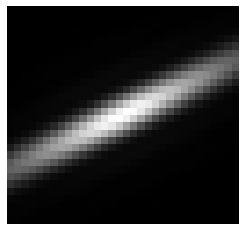

In [9]:
plt.imshow(image_data, cmap='gray')
plt.axis('off')
plt.savefig(join(fig_dir, 'training_data_img_samples.jpg'), dpi=300)

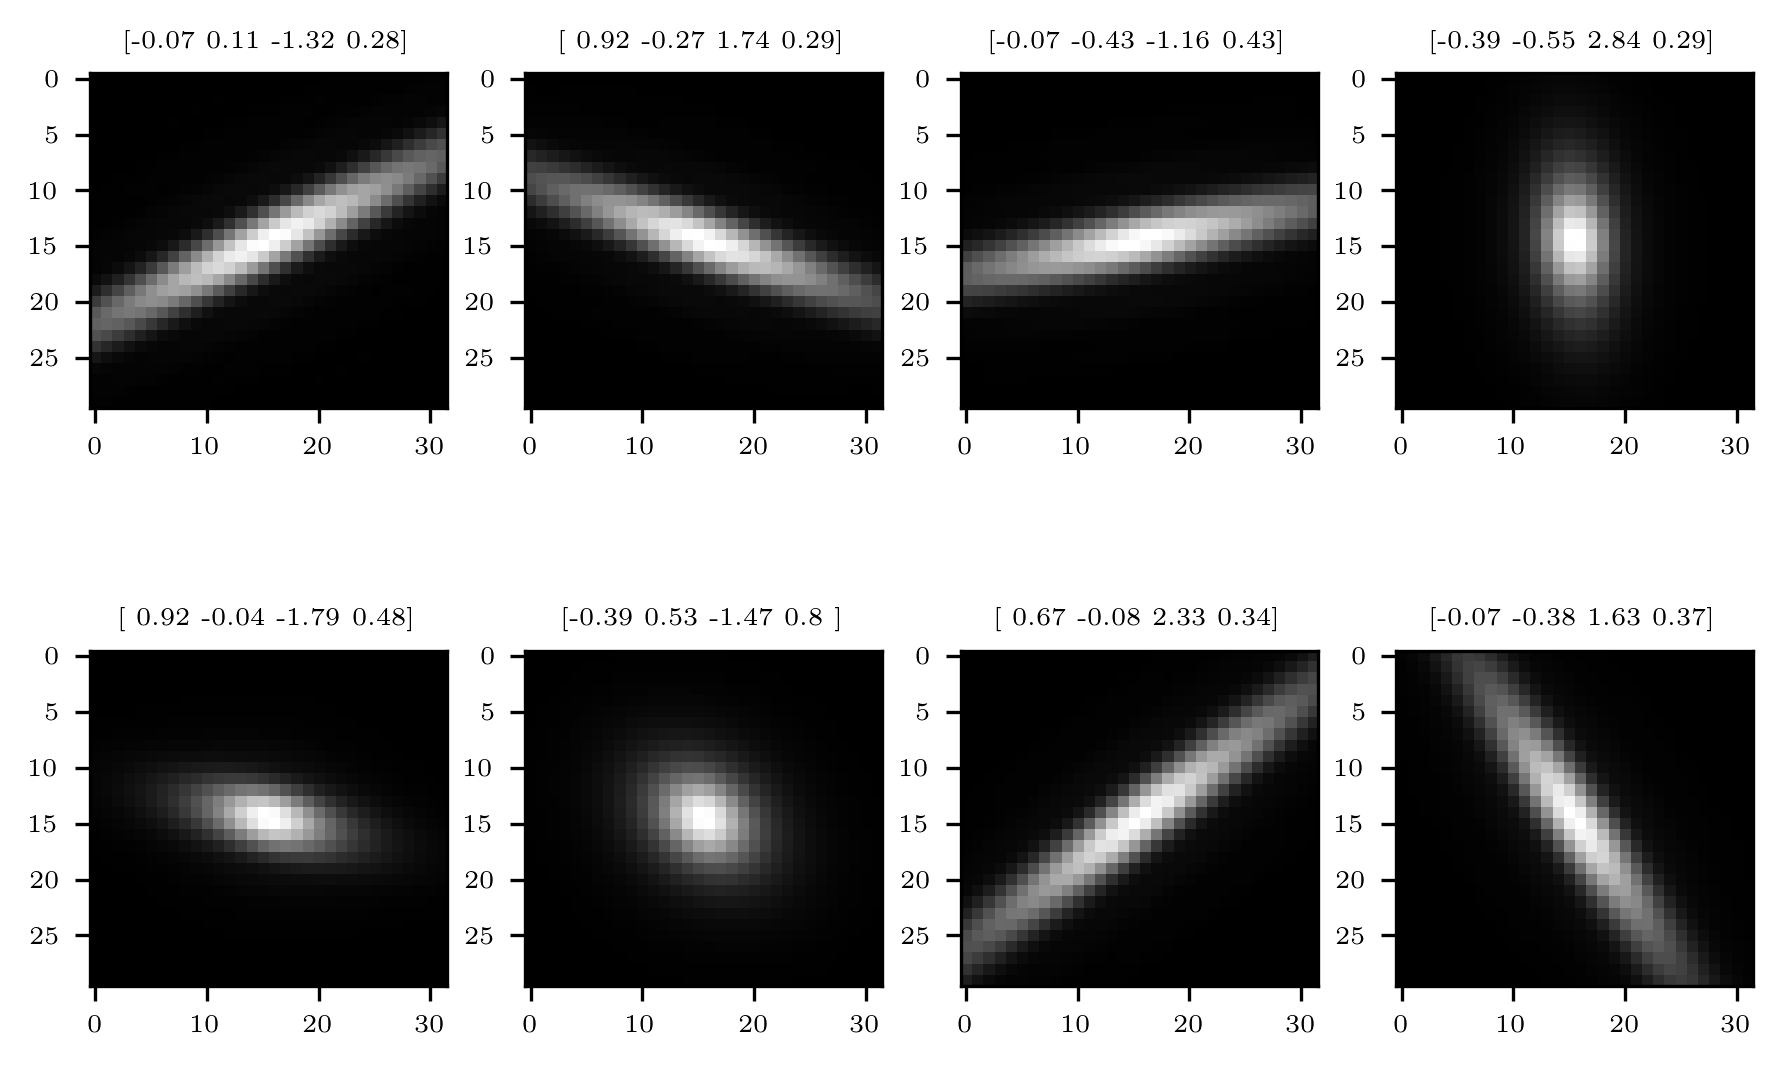

In [31]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 300})
fig, axs = plt.subplots(2, 4)
np.set_printoptions(suppress=True)

for i, ax in enumerate(axs.reshape(-1)):
    hdu = fits.open(join(fits_dir, f'training_{i}.fits'))
    params = np.round(np.array(samples.iloc[i]), 2)
    image_data = hdu[11].data
    ax.imshow(image_data, cmap='gray')
    #ax.text(-0.3, 2, f'{params[1:]}', fontsize=4, color='white')
    ax.set_title(f'{params[1:5]}', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=6)

plt.tight_layout()
plt.savefig(join(fig_dir, 'training_data_img_samples.jpg'), dpi=300)

In [49]:
fiber_offset = 1.5
offsets = [(fiber_offset*np.cos(0),         fiber_offset*np.sin(0)),
           (fiber_offset*np.cos(np.pi/2),   fiber_offset*np.sin(np.pi/2)),
           (fiber_offset*np.cos(np.pi),   fiber_offset*np.sin(np.pi)),
           (fiber_offset*np.cos(3*np.pi/2), fiber_offset*np.sin(3*np.pi/2)),
           (0,0)]

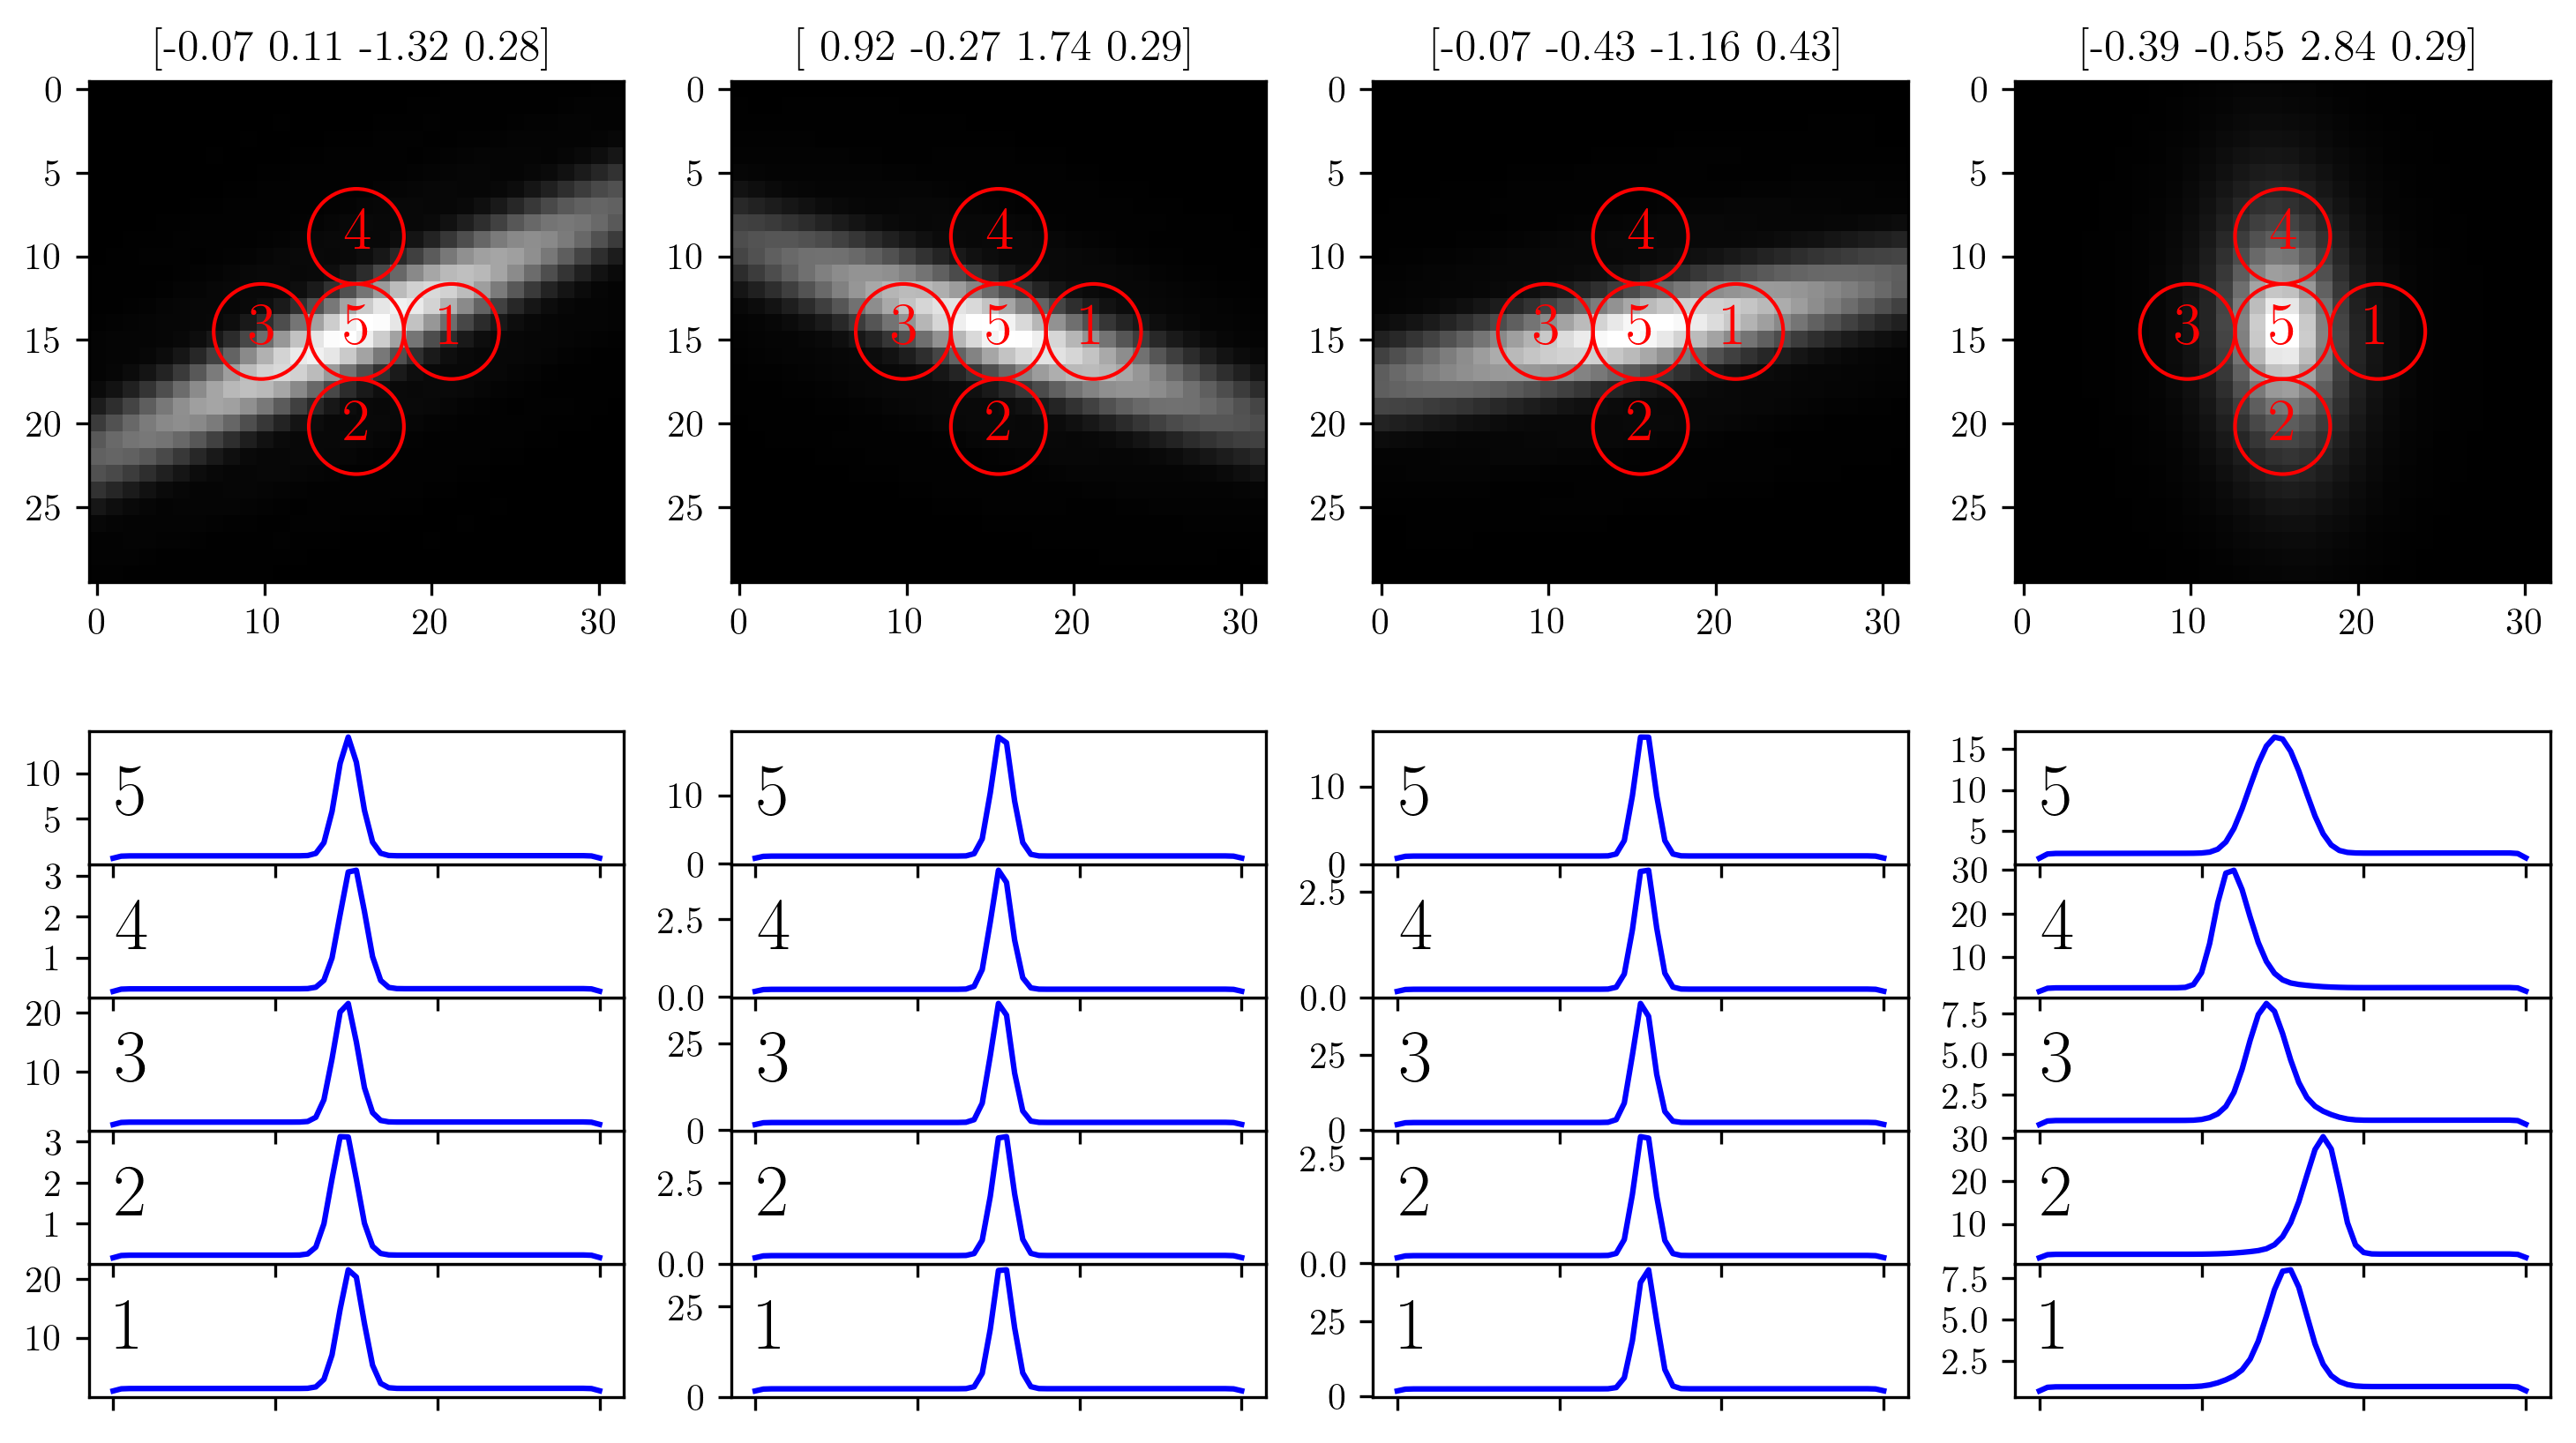

In [76]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 300})
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2, 4, wspace=0.2, hspace=0.1)


for i, grid in enumerate(gs):
    if i < 4:
        ax = plt.subplot(grid)
        hdu = fits.open(join(fits_dir, f'training_{i}.fits'))
        params = np.round(np.array(samples.iloc[i]), 2)
        image_data = hdu[11].data
        ax.imshow(image_data, cmap='gray')
        
        for j in range(5):
            x, y = offsets[j]
            x = x/pixscale + 15.5
            y = y/pixscale + 14.5
            offset = (x,y)
            fiber = patches.Circle(offset, 0.75/pixscale, color='red', fill=False)
            ax.add_patch(fiber)
            ax.text(x-0.75, y+0.75, f'{j+1}', fontsize=16, color='red')
        ax.set_title(f'{params[1:5]}')
        
    else:
        i -= 4
        hdu = fits.open(join(fits_dir, f'training_{i}.fits'))
        spec_data = hdu[1].data
        ax = plt.subplot(grid)
        plt.sca(ax)
        ax.plot(spec_data, color='blue')
        ax.text(0.05, 0.75, '1', horizontalalignment='left', verticalalignment='top', transform = ax.transAxes, fontsize=20)
        divider = make_axes_locatable(ax)

        for j in range(4):
            index = 2*(j+1)+1
            spec_data = hdu[index].data
            ax1 = divider.append_axes("top", size="100%", pad=0, sharex=ax)
            ax1.plot(spec_data, color='blue')
            ax1.text(0.05, 0.75, f'{j+2}', horizontalalignment='left', verticalalignment='top', transform = ax1.transAxes, fontsize=20)
            ax1.set_xticklabels([])

plt.savefig(join(fig_dir, 'training_data_img_samples.jpg'), dpi=300)
plt.show()

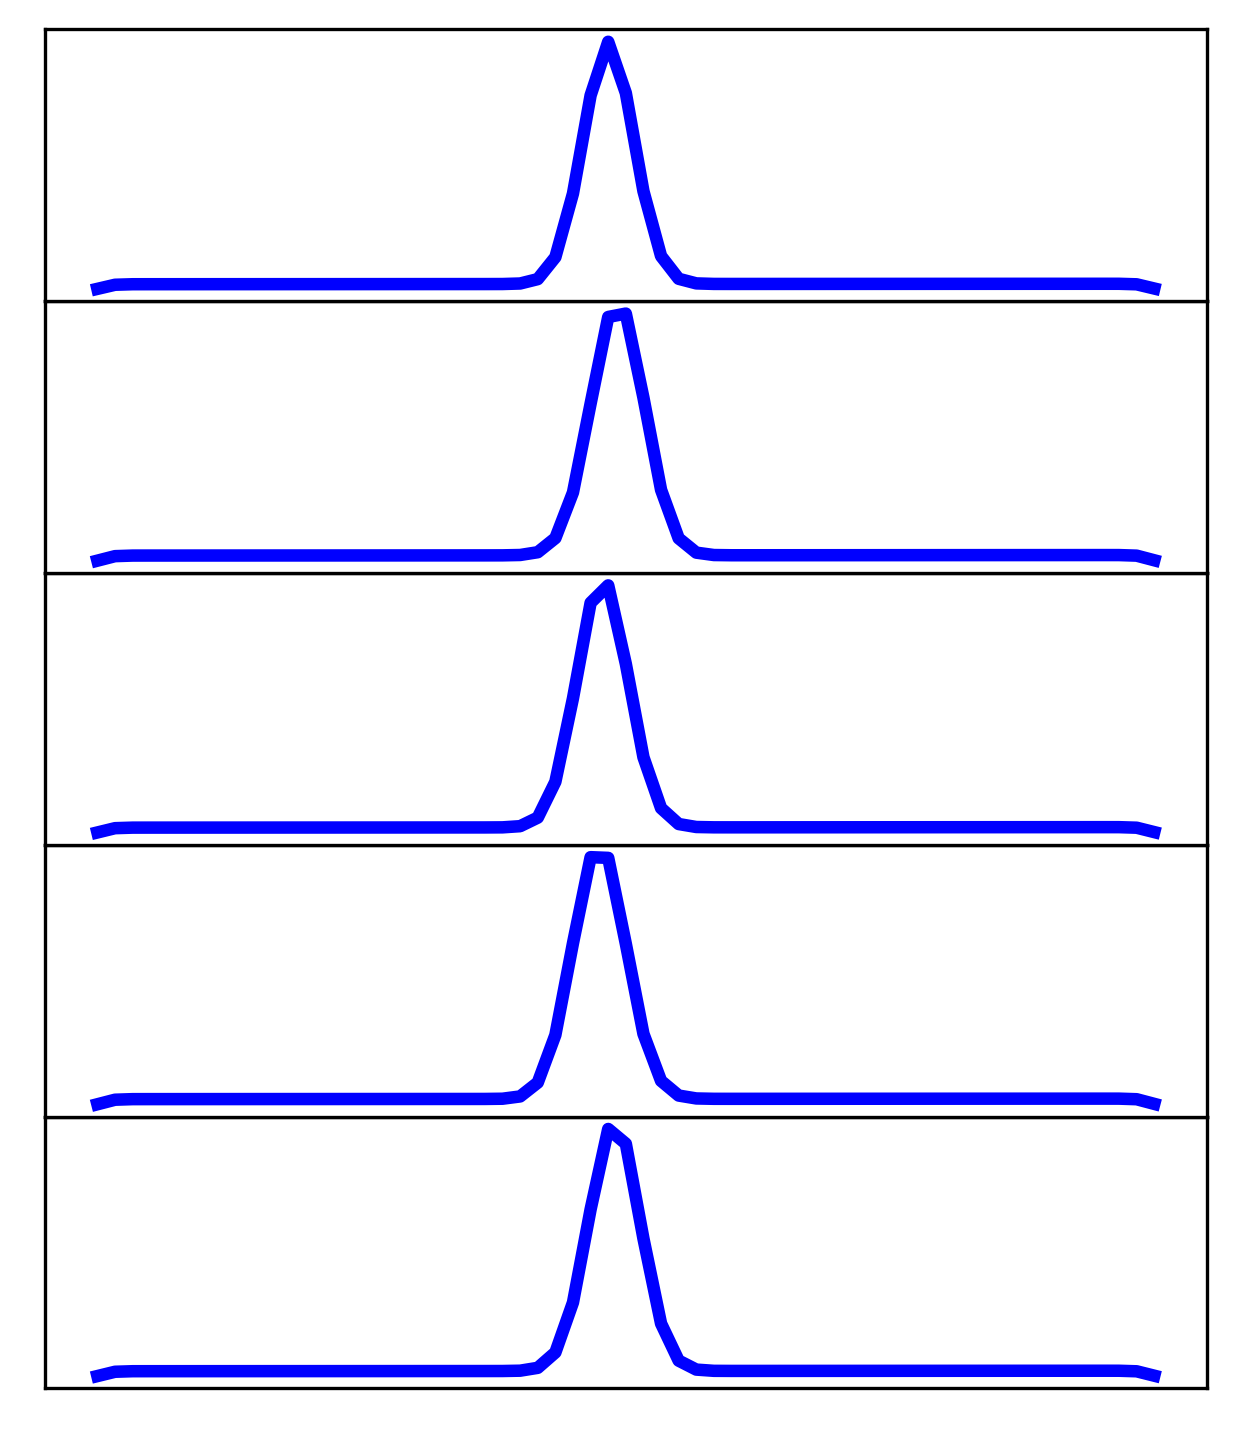

In [17]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 300})
fig, ax = plt.subplots(figsize=(5, 6))

hdu = fits.open(join(fits_dir, 'training_0.fits'))
spec_data = hdu[1].data
plt.sca(ax)
ax.plot(spec_data, color='blue', lw=3)
divider = make_axes_locatable(ax)
# set visibility of x-axis as False
xax = ax.axes.get_xaxis()
xax = xax.set_visible(False)
 
# set visibility of y-axis as False
yax = ax.axes.get_yaxis()
yax = yax.set_visible(False)

for j in range(4):
    index = 2*(j+1)+1
    spec_data = hdu[index].data
    ax1 = divider.append_axes("top", size="100%", pad=0, sharex=ax)
    ax1.plot(spec_data, color='blue', lw=3)
    ax1.set_xticklabels([])
    # set visibility of x-axis as False
    xax = ax1.axes.get_xaxis()
    xax = xax.set_visible(False)

    # set visibility of y-axis as False
    yax = ax1.axes.get_yaxis()
    yax = yax.set_visible(False)

plt.savefig(join(fig_dir, 'spectra_example.jpg'), dpi=300)